### Audio Visualization with and without VMD- Feature Maps

---


Author - David H.

In [1]:
import os
import glob
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os
import glob
import librosa
import joblib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import soundfile as sf
#from sklearn.externals import joblib
from tensorflow import keras 
from tensorflow.keras.preprocessing import image
%matplotlib inline

import tensorflow as tf
#from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing import image

import sklearn
import joblib
import tensorflow.keras as tf
from tensorflow.keras import models
from tensorflow.keras import layers
import matplotlib.pyplot as plt

%matplotlib inline

import h5py
from tensorflow.keras.models import load_model
import h5py

import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))
print(tf.test.is_built_with_cuda())

from platform import python_version
import librosa
import math
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

print(python_version())

import tensorflow

from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.base import clone
from sklearn.preprocessing import label_binarize
from scipy import interp
from sklearn.metrics import roc_curve, auc 
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.layers import Input, Flatten, Dense, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras import Sequential
from tensorflow.keras import regularizers
import numpy as np
import sys
from tensorflow.keras.models import load_model

import sklearn
import joblib
import sys
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow.keras
import tensorflow.keras as tf
from tensorflow.keras import models
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import scipy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,AveragePooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import LearningRateScheduler,ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam # I believe this is better optimizer for our case
from tensorflow.keras.preprocessing.image import ImageDataGenerator # to augmenting our images for increasing accuracy
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
%matplotlib inline

import json
import warnings
from PIL import Image
import numpy as np

from tensorflow.python.keras import activations
from tensorflow.python.keras import backend
from tensorflow.python.keras.utils import data_utils
from tensorflow.python.util.tf_export import keras_export

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from tensorflow import keras 
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import preprocess_input
import os
import librosa
import librosa.display
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import math
import subprocess
import sys
from os import path

RANDOM_SEED=2245
from numpy.random import seed
seed(RANDOM_SEED)
from sklearn.utils import shuffle

def process_sound_data(data):
    data = np.expand_dims(data, axis=0)
    data = preprocess_input(data)
    return data

from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.callbacks import Callback, ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
True
3.8.8


In [2]:
ROOT_DIR = 'fold1/'
files = glob.glob(ROOT_DIR+'/*')
len(files)
classID = [] 
for path in files:
    class_label = path.split('-')[1]
    class_label = class_label.split('.')[0]
    classID.append(class_label)

df = pd.DataFrame({'path':files, 'classID' : classID})
df

,path,classID
0,fold1\03a01Fa-4.wav,4
1,fold1\03a01Nc-5.wav,5
2,fold1\03a01Wa-0.wav,0
3,fold1\03a01Wd-0.wav,0
4,fold1\03a02Fc-4.wav,4
...,...,...
530,fold1\16b10Lb-1.wav,1
531,fold1\16b10Tb-6.wav,6
532,fold1\16b10Td-6.wav,6
533,fold1\16b10Wa-0.wav,0


In [3]:
class_map = {'0' : 'anger', '1' : 'boredom', '2' : 'disgust', '3' : 'fear', '4' : 'happiness', 
                 '5' : 'neutral', '6' : 'sadness'}
df['classID'] = df['classID'].map(class_map)
df

,path,classID
0,fold1\03a01Fa-4.wav,happiness
1,fold1\03a01Nc-5.wav,neutral
2,fold1\03a01Wa-0.wav,anger
3,fold1\03a01Wd-0.wav,anger
4,fold1\03a02Fc-4.wav,happiness
...,...,...
530,fold1\16b10Lb-1.wav,boredom
531,fold1\16b10Tb-6.wav,sadness
532,fold1\16b10Td-6.wav,sadness
533,fold1\16b10Wa-0.wav,anger


In [4]:
all_emotions = pd.DataFrame(df.groupby('classID').apply(lambda x: x['path'].unique()[0])).reset_index()
all_emotions.columns = ['classID', 'Path']
all_emotions

,classID,Path
0,anger,fold1\03a01Wa-0.wav
1,boredom,fold1\03a04Lc-1.wav
2,disgust,fold1\03b10Ec-2.wav
3,fear,fold1\03a04Ad-3.wav
4,happiness,fold1\03a01Fa-4.wav
5,neutral,fold1\03a01Nc-5.wav
6,sadness,fold1\03a02Ta-6.wav


### Without VMD

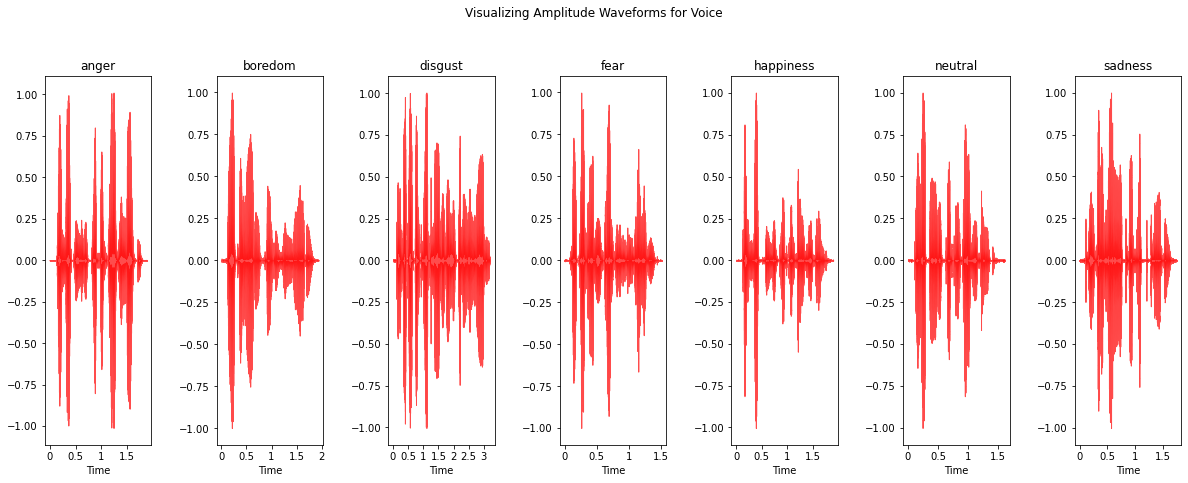

In [42]:
def get_sound_data(path, sr=88200):
    data, fsr = sf.read(path)
    data_resample = librosa.resample(data.T, fsr, sr)
    if len(data_resample.shape) > 1:
        data_resample = np.average(data_resample, axis=0)
    return data_resample


sound_rate = 44100

i = 1
fig = plt.figure(figsize = (17,7))
t = plt.suptitle('Visualizing Amplitude Waveforms for Voice')
fig.subplots_adjust(top = 0.8, wspace=0.2)

for sound_class in all_emotions['classID'].tolist():
    data = get_sound_data(all_emotions['Path'][i-1], sr=sound_rate)
    plt.subplot(1,7,i)
    librosa.display.waveshow(data, sr = sound_rate, color = 'red', alpha = 0.7)
    plt.title(sound_class)
    i+=1
plt.tight_layout(pad = 2.5)    

#### With VMD

In [6]:
from tqdm import tqdm
import librosa as lb
from vmdpy import VMD  

def energy(u):
    # Estimate PSD `S_xx_welch` at discrete frequencies `f_welch`
    f_welch, S_xx_welch = scipy.signal.welch(u)
    # Integrate PSD over spectral bandwidth
    # to obtain signal power `P_welch`
    df_welch = f_welch[1] - f_welch[0]
    return np.sum(S_xx_welch) * df_welch  

def maxvdm(f, alpha, K):
    tau = 0            
    DC = 0             
    init = 1           
    tol = 1e-9
    u, u_hat, omega = VMD(f, alpha, tau, K, DC, init, tol) 
    energy_array=[]
    for i in u:
        energy_array.append(energy(i))
    ind = np.argmax(energy_array)
    return u[ind]

def vm(features, alpha, K):
    X = []
    for i in tqdm(features):
        X.append(maxvdm(i, alpha, K))
    return X

In [7]:
all_emotions

,classID,Path
0,anger,fold1\03a01Wa-0.wav
1,boredom,fold1\03a04Lc-1.wav
2,disgust,fold1\03b10Ec-2.wav
3,fear,fold1\03a04Ad-3.wav
4,happiness,fold1\03a01Fa-4.wav
5,neutral,fold1\03a01Nc-5.wav
6,sadness,fold1\03a02Ta-6.wav


In [8]:
anger_data = get_sound_data(all_emotions['Path'][0])
anger_data = anger_data.tolist()

boredom_data = get_sound_data(all_emotions['Path'][1])
boredom_data = boredom_data.tolist()

disgust_data = get_sound_data(all_emotions['Path'][2])
disgust_data = disgust_data.tolist()

fear_data = get_sound_data(all_emotions['Path'][3])
fear_data = fear_data.tolist()

happiness_data = get_sound_data(all_emotions['Path'][4])
happiness_data = happiness_data.tolist()

neutral_data = get_sound_data(all_emotions['Path'][5])
neutral_data = neutral_data.tolist()

sadness_data = get_sound_data(all_emotions['Path'][6])
sadness_data = sadness_data.tolist()

In [10]:
anger_feature_map = VMD(anger_data, alpha = 2000, tau=0, K = 4, DC=0, init=1, tol=1e-9)
boredom_feature_map = VMD(boredom_data, alpha = 2000, tau=0, K = 6, DC=0, init=1, tol=1e-9)

In [11]:
disgust_feature_map = VMD(disgust_data, alpha = 2000, tau=0, K = 8, DC=0, init=1, tol=1e-9)
fear_feature_map = VMD(fear_data, alpha = 4000, tau=0, K = 4, DC=0, init=1, tol=1e-9)

In [12]:
happiness_feature_map = VMD(happiness_data, alpha = 2000, tau=0, K = 10, DC=0, init=1, tol=1e-9)

In [13]:
neutral_feature_map = VMD(neutral_data, alpha = 2000, tau=0, K = 14, DC=0, init=1, tol=1e-9)

In [15]:
sadness_feature_map = VMD(sadness_data, alpha = 2000, tau=0, K = 14, DC=0, init=1, tol=1e-9)

In [16]:
feature_map = [anger_feature_map, boredom_feature_map, disgust_feature_map, fear_feature_map, happiness_feature_map, neutral_feature_map, sadness_feature_map]

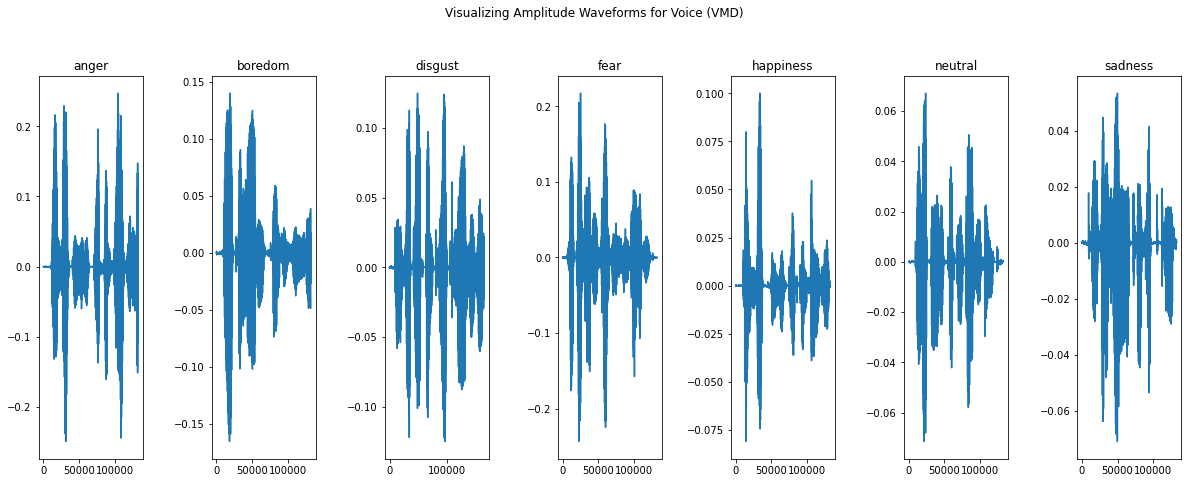

In [46]:
sound_class = all_emotions['classID'].tolist()

fig = plt.figure(figsize = (17,7))
t = plt.suptitle('Visualizing Amplitude Waveforms for Voice (VMD)')
fig.subplots_adjust(top = 0.8, wspace=0.2)

plt.subplot(1,7,1)
plt.title(sound_class[0])
plt.plot(np.mean(np.array(feature_map[0][0]), axis = 0)[:np.mean(feature_map[3][0], axis=0)[:feature_map[1][0].shape[1]].shape[0]])

plt.subplot(1,7,2)
plt.title(sound_class[1])
plt.plot(np.mean(feature_map[1][0], axis=0)[:np.mean(feature_map[3][0], axis=0)[:feature_map[1][0].shape[1]].shape[0]])

plt.subplot(1,7,3)
plt.title(sound_class[2])
plt.plot(np.mean(feature_map[2][0], axis=0)[:np.mean(feature_map[3][0], axis=0)[:feature_map[1][0].shape[1]].shape[0]])

plt.subplot(1,7,4)
plt.title(sound_class[3])
plt.plot(np.mean(feature_map[3][0], axis=0)[:np.mean(feature_map[3][0], axis=0)[:feature_map[1][0].shape[1]].shape[0]])

plt.subplot(1,7,5)
plt.title(sound_class[4])
plt.plot(np.mean(feature_map[4][0], axis=0)[:np.mean(feature_map[3][0], axis=0)[:feature_map[1][0].shape[1]].shape[0]])


plt.subplot(1,7,6)
plt.title(sound_class[5])
plt.plot(np.mean(feature_map[5][0], axis=0)[:np.mean(feature_map[3][0], axis=0)[:feature_map[1][0].shape[1]].shape[0]])

plt.subplot(1,7,7)
plt.title(sound_class[6])
plt.plot(np.mean(feature_map[6][0], axis=0)[:np.mean(feature_map[3][0], axis=0)[:feature_map[1][0].shape[1]].shape[0]])

plt.tight_layout(pad = 2.5)
plt.show();

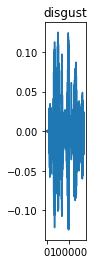

In [74]:
plt.subplot(1,7,3)
plt.title(sound_class[2])
plt.plot(np.mean(feature_map[2][0], axis=0)[:np.mean(feature_map[0][0], axis=0)[:feature_map[1][0].shape[1]].shape[0]])



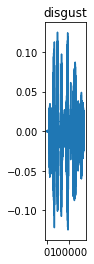

In [64]:
plt.subplot(1,7,3)
plt.title(sound_class[2])
plt.plot(np.mean(feature_map[2][0], axis=0)[:np.mean(feature_map[2][0], axis=0)[:feature_map[1][0].shape[1]].shape[0]])

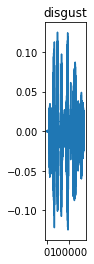

In [52]:
plt.subplot(1,7,3)
plt.title(sound_class[2])
plt.plot(np.mean(feature_map[2][0], axis=0)[:np.mean(feature_map[2][0], axis=0)[:feature_map[1][0].shape[1]].shape[0]])